# Tree Methods Project

### For this project we will be exploring the use of tree methods to classify schools as Private or Public based off their features.

##### A data frame with 777 observations on the following 18 variables.
##### 
##### Private A factor with levels No and Yes indicating private or public university
##### Apps Number of applications received
##### Accept Number of applications accepted
##### Enroll Number of new students enrolled
##### Top10perc Pct. new students from top 10% of H.S. class
##### Top25perc Pct. new students from top 25% of H.S. class
##### F.Undergrad Number of fulltime undergraduates
##### P.Undergrad Number of parttime undergraduates
##### Outstate Out-of-state tuition
##### Room.Board Room and board costs
##### Books Estimated book costs
##### Personal Estimated personal spending
##### PhD Pct. of faculty with Ph.D.’s
##### Terminal Pct. of faculty with terminal degree
##### S.F.Ratio Student/faculty ratio
##### perc.alumni Pct. alumni who donate
##### Expend Instructional expenditure per student
##### Grad.Rate Graduation rate

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Get the Data

In [3]:
#Reading in the data
#Seting the first column as the index.
df=pd.read_csv('College_Data',index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
#Check the info() and describe() methods on the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# EDA

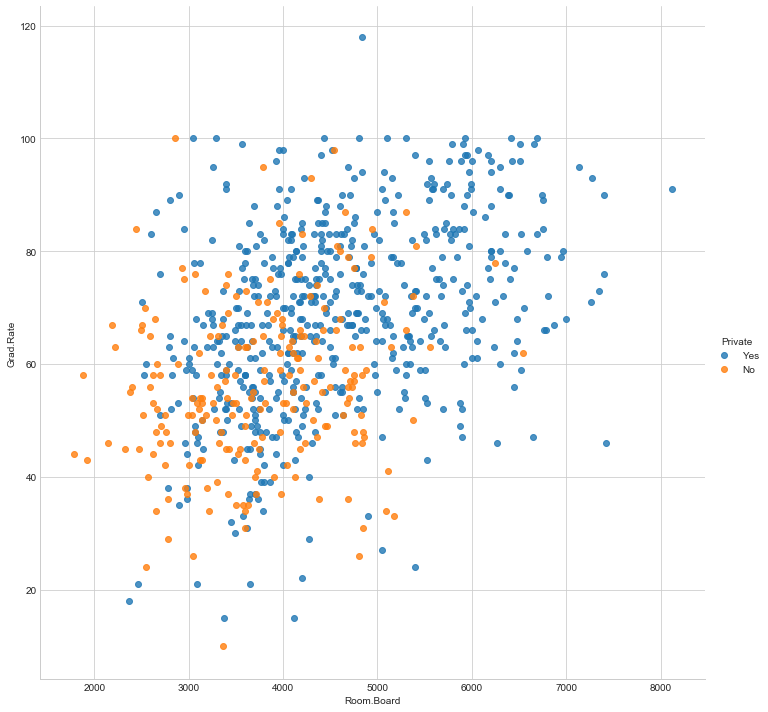

In [5]:
#Creating a scatterplot of Grad.Rate versus Room.Board, colored by the Private column.
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',size=10,fit_reg=False)

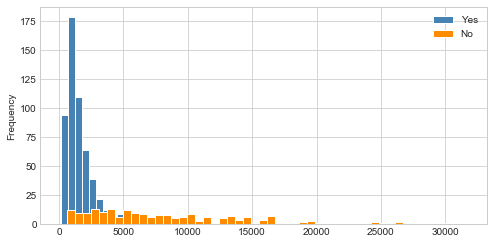

In [9]:
#Creating a histogram of full time undergrad students, color by Private
plt.figure(figsize=(8,4))
df[df['Private']=='Yes']['F.Undergrad'].plot.hist(bins=50,color='steelblue',edgecolor='white',label='Yes')
df[df['Private']=='No']['F.Undergrad'].plot.hist(bins=50,color='darkorange',edgecolor='white',label='No')
plt.legend()

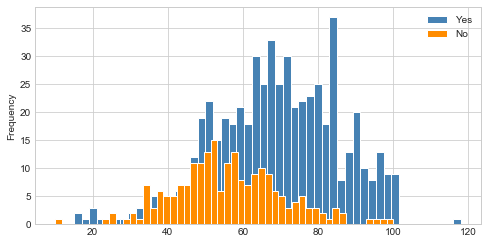

In [10]:
#Creating a histogram of Grad.Rate colored by Private
plt.figure(figsize=(8,4))
df[df['Private']=='Yes']['Grad.Rate'].plot.hist(bins=50,color='steelblue',edgecolor='white',label='Yes')
df[df['Private']=='No']['Grad.Rate'].plot.hist(bins=50,color='darkorange',edgecolor='white',label='No')
plt.legend()

In [11]:
#Some college had a Graduation Rate of above 100%?
print(df[df['Grad.Rate']>100]['Grad.Rate'])

Cazenovia College    118
Name: Grad.Rate, dtype: int64


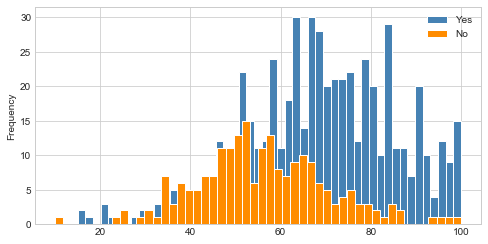

In [13]:
#Setting the limit for grad rate to 100%
df['Grad.Rate'] = df['Grad.Rate'].apply(lambda x: 100 if x > 100 else x)

plt.figure(figsize=(8,4))
df[df['Private']=='Yes']['Grad.Rate'].plot.hist(bins=50,color='steelblue',edgecolor='white',label='Yes')
df[df['Private']=='No']['Grad.Rate'].plot.hist(bins=50,color='darkorange',edgecolor='white',label='No')
plt.legend()

# Train Test Split

In [16]:
#Spliting data into training and testing sets 70/30
df['Private_flag'] = df['Private'].apply(lambda x: 1 if x == "Yes" else 0)

x = df.drop(['Private_flag','Private'],axis=1)
y = df['Private_flag']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# Decision Tree

In [18]:
#Training a Decision Tree Model to predict whether or not a school is Private
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
#Predictions and Evaluation of Decision Tree
#Creating predictions from the test set and create a classification report and a confusion matrix.
predictions = dtree.predict(x_test)

print('confusion_matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('classification_report')
print(classification_report(y_test,predictions))

confusion_matrix
[[ 47  11]
 [ 14 162]]


classification_report
             precision    recall  f1-score   support

          0       0.77      0.81      0.79        58
          1       0.94      0.92      0.93       176

avg / total       0.90      0.89      0.89       234



# Random Forest

In [21]:
#Training a Random Forest Model to predict whether or not a school is Private
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
#Predictions and Evaluation of Random Forest
#Creating predictions from the test set and create a classification report and a confusion matrix.
predictions = rfc.predict(x_test)

print('confusion_matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('classification_report')
print(classification_report(y_test,predictions))

confusion_matrix
[[ 48  10]
 [  4 172]]


classification_report
             precision    recall  f1-score   support

          0       0.92      0.83      0.87        58
          1       0.95      0.98      0.96       176

avg / total       0.94      0.94      0.94       234

